## Microsam via Pixi environment example

### Making Pixi Environment Visible in VS Code - Reminder

**Standard Setup: Register as Jupyter Kernel**
1. Navigate to your pixi environment folder (e.g., `pixi/microsam_cellpose3/`)
2. Run: `pixi run python -m ipykernel install --user --name=microsam --display-name "Python (microsam)"`
3. In VS Code, select the kernel from the dropdown

**If DLLs aren't loading correctly (CUDNN issues):**
You may need to launch VS Code from within pixi shell:
1. Navigate to environment folder: `cd pixi/microsam_cellpose3/`
2. Start pixi shell: `pixi shell`
3. Launch VS Code from shell: `code .`

**If you don't use VS Code:**
If you prefer Jupyter notebook instead of VS Code, launching from pixi shell might work for you (we haven't tested this):
1. Start pixi shell: `pixi shell` 
2. Launch Jupyter: `jupyter notebook`

**Environment Verification**
We print package versions below to verify the environment is working correctly. Pay special attention to CUDNN version - if it shows as unavailable (or crashes the kernel), your paths may not be set correctly.

In [1]:
import micro_sam
print("microsam version:", micro_sam.__version__)

import torch
import numpy as np

print("Torch version:", torch.__version__)
print("NumPy version:", np.__version__)

print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU name:", torch.cuda.get_device_name(0))

print("cuDNN available:", torch.backends.cudnn.is_available())
print("cuDNN version:", torch.backends.cudnn.version())

microsam version: 1.6.2
Torch version: 2.6.0
NumPy version: 2.3.4
CUDA available: True
GPU name: NVIDIA GeForce RTX 3090
cuDNN available: True
cuDNN version: 91002
Torch version: 2.6.0
NumPy version: 2.3.4
CUDA available: True
GPU name: NVIDIA GeForce RTX 3090
cuDNN available: True
cuDNN version: 91002


## Other imports

Now import microsam, matplotlib, and tnia plotting helpers.

In [2]:
from micro_sam.automatic_segmentation import get_predictor_and_segmenter, automatic_instance_segmentation
from skimage.io import imread
import matplotlib.pyplot as plt
# Import visualization helper
from tnia.plotting.plt_helper import mask_overlay

c:\Users\bnort\work\ImageJ2022\tnia\notebooks-and-napari-widgets-for-dl\pixi\microsam_cellposesam\.pixi\envs\default\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Get microsam predictor and segmenter

In [4]:
tile_shape = None #(384, 384)
halo = (64, 64)
model_type = "vit_b_lm"

device = "cuda" if torch.cuda.is_available() else "cpu" # the device/GPU used for training
# Step 1: Get the 'predictor' and 'segmenter' to perform automatic instance segmentation.
predictor, segmenter = get_predictor_and_segmenter(
    model_type=model_type, # choice of the Segment Anything model
    #checkpoint=best_checkpoint,  # overwrite to pass your own finetuned model.
    device=device,  # the device to run the model inference.
    is_tiled = False #(tile_shape is not None),  # whether the model is tiled or not.
)

## Open test images

In [5]:

image_path = r"..\..\data\SOTA_segmentation\cell_00068.bmp"
label_path = r"..\..\data\SOTA_segmentation\cell_00068_label.tiff"

image = imread(image_path)
ground_truth = imread(label_path)

print(f"Image shape: {image.shape}")
print(f"Ground truth shape: {ground_truth.shape}")

Image shape: (1536, 2040, 3)
Ground truth shape: (1536, 2040)


## Call microsam automatic instance segmentation

In [6]:

# Step 2: Get the instance segmentation for the given image.
prediction = automatic_instance_segmentation(
    predictor=predictor,  # the predictor for the Segment Anything model.
    segmenter=segmenter,  # the segmenter class responsible for generating predictions.
    input_path=image,
    ndim=2,
    #tile_shape=tile_shape,
    #halo=halo,
)


Initialize instance segmentation with decoder: 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]



## Plotting

Plot ground truth and microsam prediction as overlays on original image

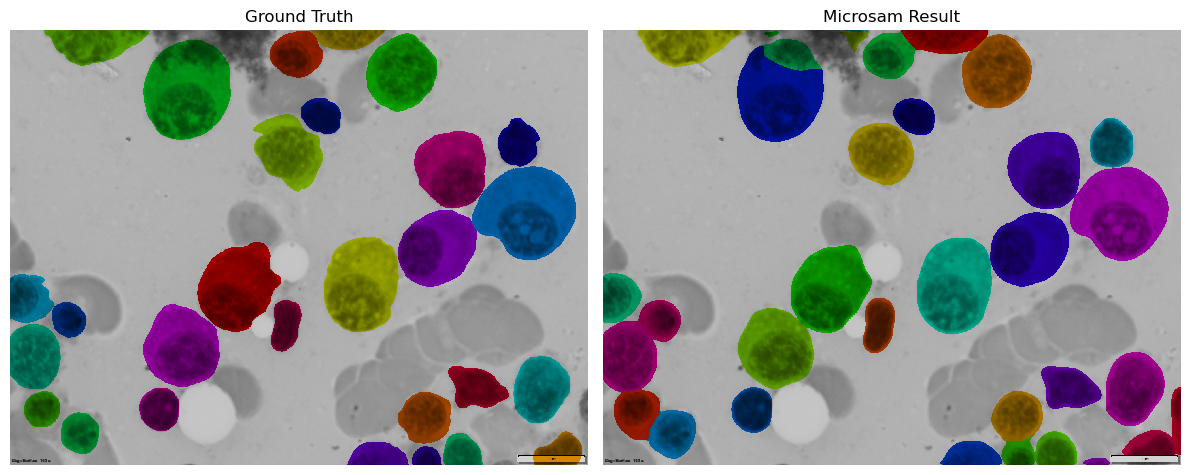

In [7]:
# Create overlays
ground_truth_overlay = mask_overlay(image, ground_truth)
result_overlay = mask_overlay(image, prediction)

# Create comparison plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(ground_truth_overlay)
axes[0].set_title('Ground Truth')
axes[0].axis('off')

axes[1].imshow(result_overlay)
axes[1].set_title('Microsam Result')
axes[1].axis('off')

plt.tight_layout()
plt.show()